In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

import requests
import glob

In [2]:
df1=pd.read_csv(r"C:\Users\visha\Downloads\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2=pd.read_csv(r"C:\Users\visha\Downloads\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3=pd.read_csv(r"C:\Users\visha\Downloads\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df4=pd.read_csv(r"C:\Users\visha\Downloads\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df5=pd.read_csv(r"C:\Users\visha\Downloads\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df=pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
927661,2024-06,YISHUN,5 ROOM,865,YISHUN ST 81,07 TO 09,122.0,Improved,1988,680000.0,62 years 10 months
927662,2024-06,YISHUN,EXECUTIVE,328,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,850000.0,63 years 01 month
927663,2024-06,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,790000.0,61 years
927664,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62 years 08 months


In [3]:
df.shape


(927666, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927666 entries, 0 to 927665
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                927666 non-null  object 
 1   town                 927666 non-null  object 
 2   flat_type            927666 non-null  object 
 3   block                927666 non-null  object 
 4   street_name          927666 non-null  object 
 5   storey_range         927666 non-null  object 
 6   floor_area_sqm       927666 non-null  float64
 7   flat_model           927666 non-null  object 
 8   lease_commence_date  927666 non-null  int64  
 9   resale_price         927666 non-null  float64
 10  remaining_lease      218616 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.9+ MB


In [5]:
df.columns


Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [6]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,927666.000000,927666.000000,9.276660e+05
mean,95.690710,1988.279880,3.209078e+05
std,25.824416,10.666957,1.705749e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1981.000000,1.930000e+05
50%,93.000000,1986.000000,2.980000e+05
75%,113.000000,1996.000000,4.180000e+05
max,307.000000,2020.000000,1.588000e+06


In [7]:
df.nunique()

month                   414
town                     27
flat_type                 8
block                  2711
street_name             584
storey_range             25
floor_area_sqm          212
flat_model               34
lease_commence_date      55
resale_price           9529
remaining_lease         726
dtype: int64

In [8]:
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [9]:
def convert_to_years(row):
    if pd.notna(row) and isinstance(row, str):
        if 'years' in row:
            parts = row.split()
            years = float(parts[0])
            months = float(parts[2]) if len(parts) > 2 else 0
            return years + months / 12
    return row

In [10]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)

In [11]:
# fill null values in remaining_lease with mode beacuse null value more than 25% it will remove affected in accuracy
df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
927661,2024-06,YISHUN,5 ROOM,865,YISHUN ST 81,07 TO 09,122.0,Improved,1988,680000.0,62.833333
927662,2024-06,YISHUN,EXECUTIVE,328,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,850000.0,63.083333
927663,2024-06,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,790000.0,61.000000
927664,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62.666667
927665,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,1000000.0,62.666667


In [12]:

df['remaining_lease'].value_counts()

remaining_lease
68.000000    711643
95.000000      2380
67.000000      2212
69.000000      1914
71.000000      1763
              ...  
96.833333         1
97.250000         1
97.416667         1
97.583333         1
41.500000         1
Name: count, Length: 673, dtype: int64

In [13]:
df.isnull().sum()


month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [14]:

df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
dtype: object

In [15]:
# Separate the year and month of resale beacuse this is time series Data
df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)

# drop the resale month column
df.drop('month', axis = 1, inplace= True)

df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0,1990,01


In [16]:
# Split the 'Range' column into lower and upper bounds
df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df['storey_lower_bound'] = pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'])
df.drop('storey_range', axis = 1, inplace= True)

In [17]:
df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')
df['block'] = df['block'].fillna(df['block'].mode()[0])

In [18]:
df.dtypes

town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

In [19]:
object_data= [var for var in df.columns if df[var].dtype == 'object']
object_data

['town', 'flat_type', 'street_name', 'flat_model']

In [20]:
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,1,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,1,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,1,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,1,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000


In [21]:
df.duplicated().sum()

2347

In [22]:
df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977,9000.0,68.000000,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977,6000.0,68.000000,1990,1,4,6
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977,8000.0,68.000000,1990,1,10,12
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977,6000.0,68.000000,1990,1,7,9
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,New Generation,1976,47200.0,68.000000,1990,1,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
927661,YISHUN,5 ROOM,865.0,YISHUN ST 81,122.0,Improved,1988,680000.0,62.833333,2024,6,7,9
927662,YISHUN,EXECUTIVE,328.0,YISHUN RING RD,142.0,Apartment,1988,850000.0,63.083333,2024,6,4,6
927663,YISHUN,EXECUTIVE,723.0,YISHUN ST 71,146.0,Maisonette,1986,790000.0,61.000000,2024,6,10,12
927664,YISHUN,EXECUTIVE,826.0,YISHUN ST 81,146.0,Maisonette,1988,1000000.0,62.666667,2024,6,10,12


In [23]:
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')


In [67]:
df['resale_year'].min()

1990

In [24]:
df['flat_type']

0            1 ROOM
1            1 ROOM
2            1 ROOM
3            1 ROOM
4            3 ROOM
            ...    
927661       5 ROOM
927662    EXECUTIVE
927663    EXECUTIVE
927664    EXECUTIVE
927665    EXECUTIVE
Name: flat_type, Length: 927666, dtype: object

In [25]:

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

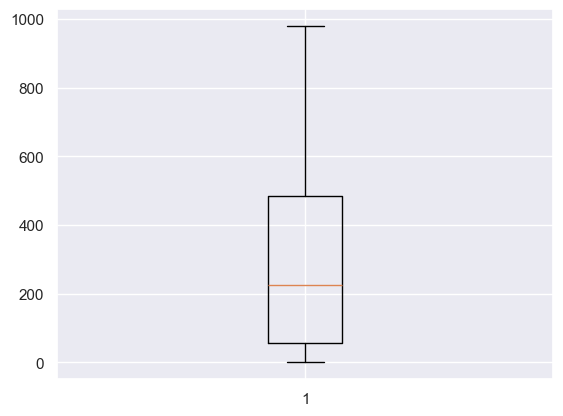

In [27]:
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()

In [28]:
        # IQR

Q1 = df['block'].quantile(0.25)
Q3 = df['block'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-586.0, 1126.0)

In [29]:
df.block = df.block.clip(lower_bound , upper_bound)

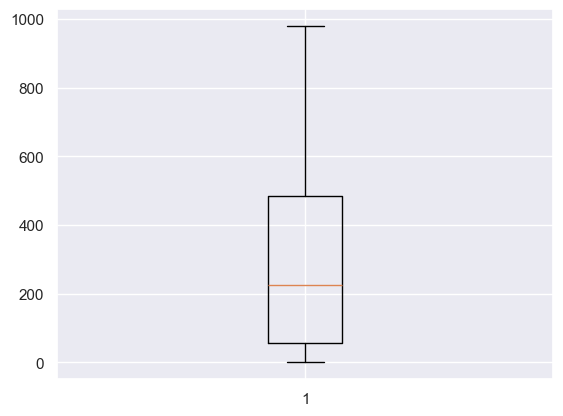

In [30]:

# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()

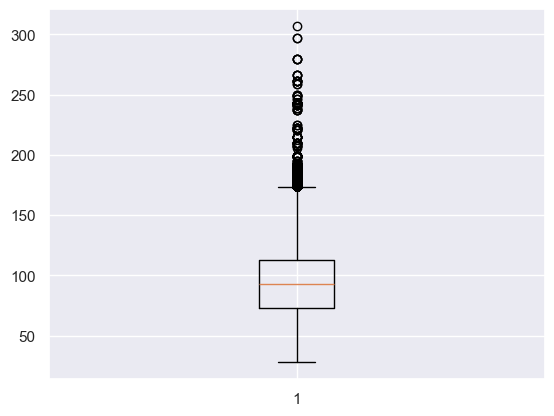

In [31]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

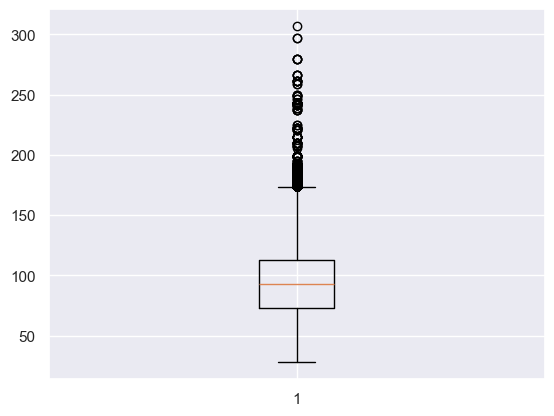

In [32]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

In [33]:
df.floor_area_sqm = df.floor_area_sqm.clip(lower_bound , upper_bound)

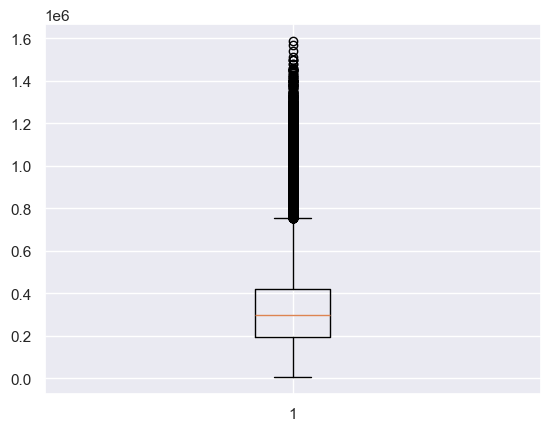

In [34]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

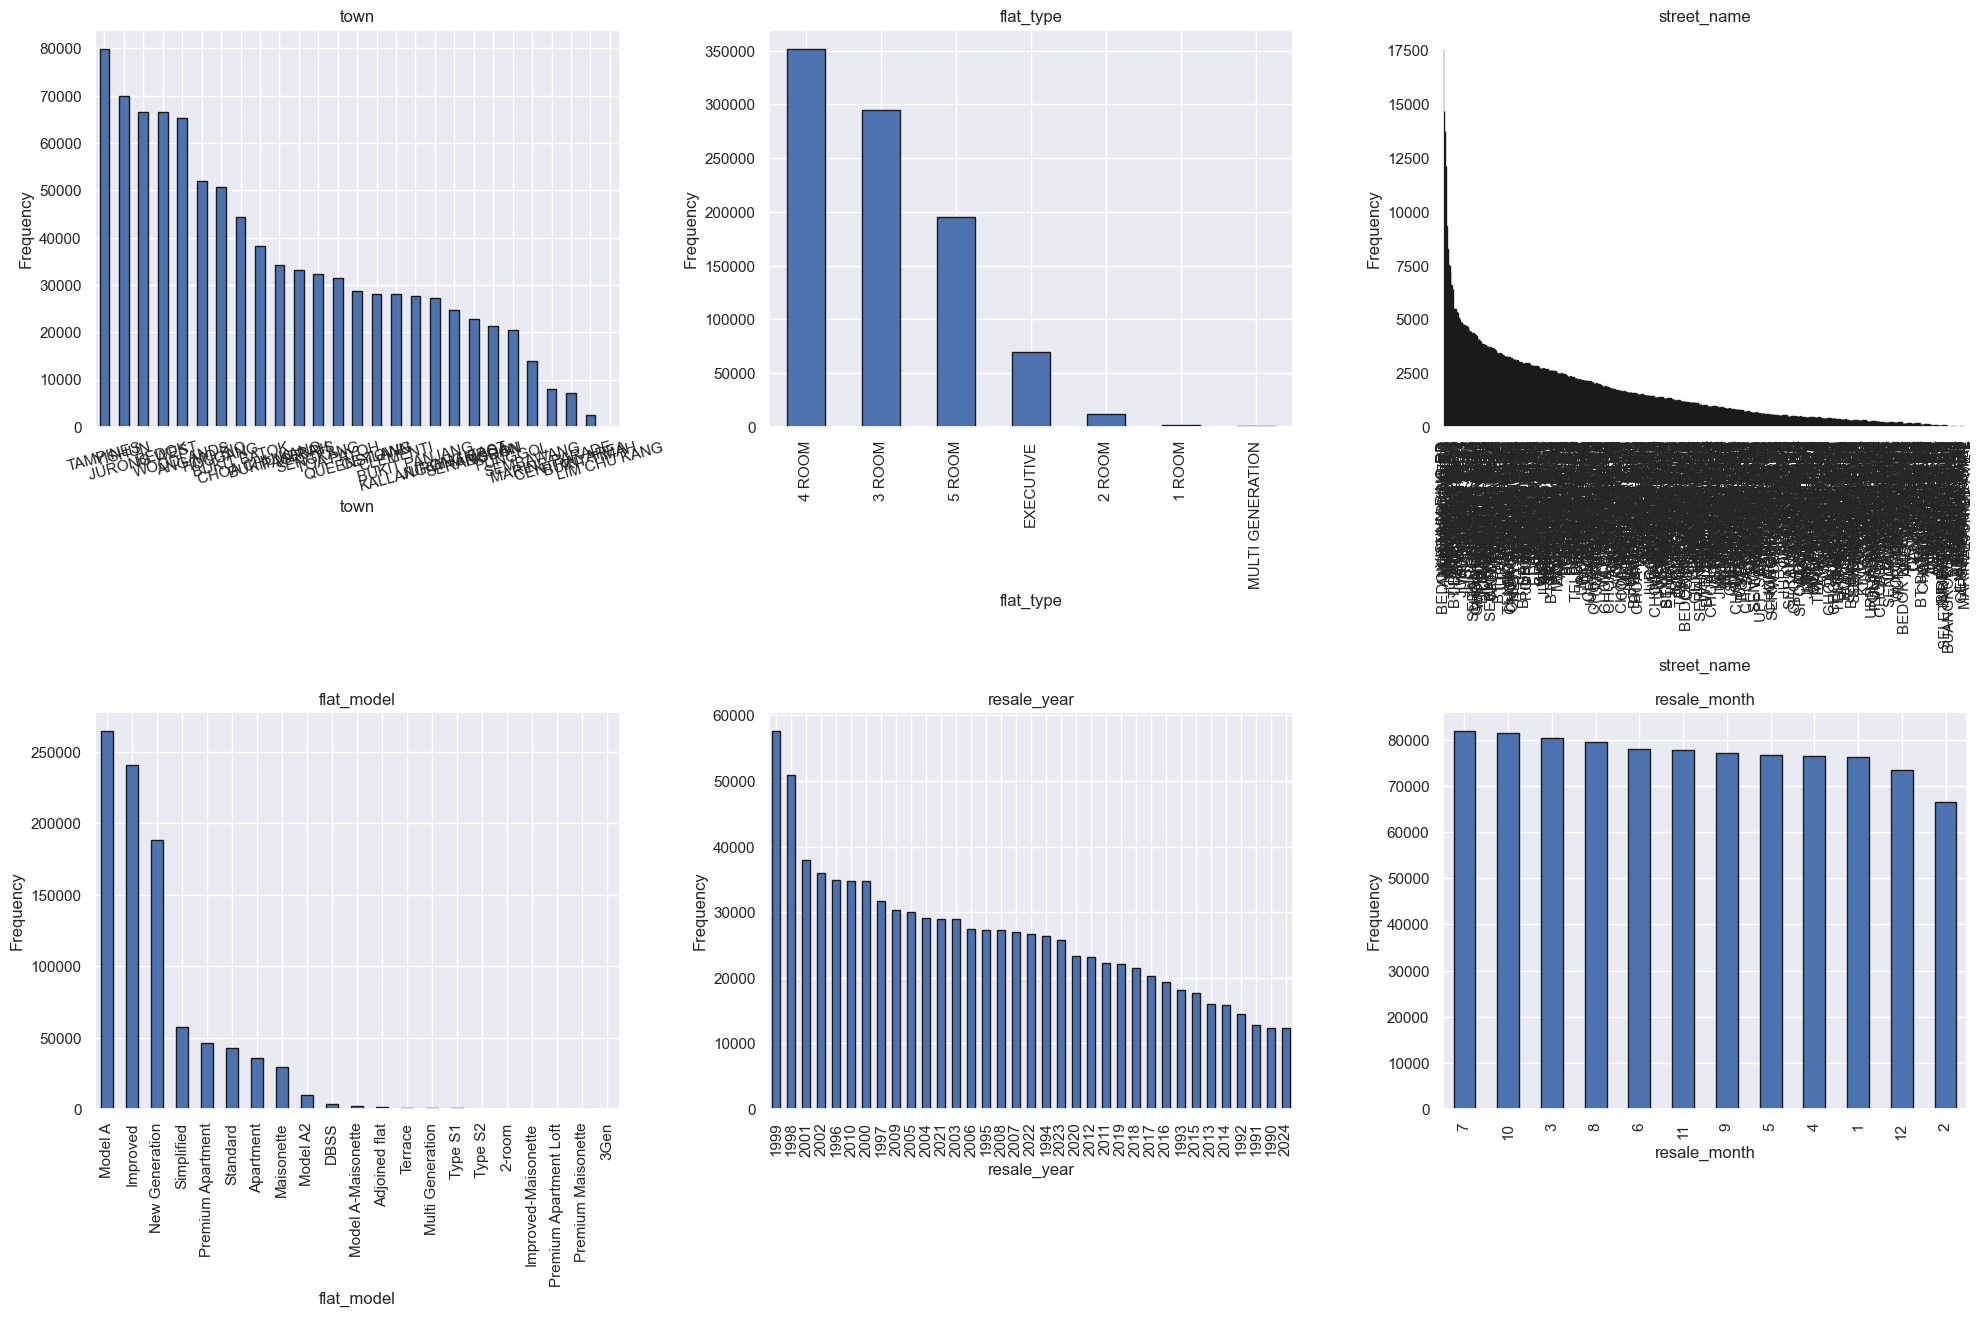

In [35]:
plt.figure(figsize=(20, 25))



plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('town')
plt.xlabel('town')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Frequency')

plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('street_name')
plt.xlabel('street_name')
plt.ylabel('Frequency')

plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_model')
plt.xlabel('flat_model')
plt.ylabel('Frequency')

plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_year')
plt.xlabel('resale_year')
plt.ylabel('Frequency')

plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_month')
plt.xlabel('resale_month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [26]:
#using encoding make a copy
d=df.copy()

object_data_cols = [var for var in d.columns if d[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [28]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()

In [29]:
# list unique street names
streets = d['street_name'].unique()
# map the streets to povide input to ML model
streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [75]:
streets

array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

In [30]:
d['street_name'] = d['street_name'].map(streets_mapping)

# Display the DataFrame
d.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977,6000.0,68.0,1990,1,4,6


In [31]:
# Create a mapping of 'town' values to numbers
town_mapping = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT TIMAH': 6,
    'CENTRAL AREA': 7,
    'CHOA CHU KANG': 8,
    'CLEMENTI': 9,
    'GEYLANG': 10,
    'HOUGANG': 11,
    'JURONG EAST': 12,
    'JURONG WEST': 13,
    'KALLANG/WHAMPOA': 14,
    'MARINE PARADE': 15,
    'QUEENSTOWN': 16,
    'SENGKANG': 17,
    'SERANGOON': 18,
    'TAMPINES': 19,
    'TOA PAYOH': 20,
    'WOODLANDS': 21,
    'YISHUN': 22,
    'LIM CHU KANG': 23,
    'SEMBAWANG': 24,
    'BUKIT PANJANG': 25,
    'PASIR RIS': 26,
    'PUNGGOL': 27
}

# Map 'town' values to numbers
d['town'] = d['town'].map(town_mapping)

# Display the DataFrame
d.head(4)


,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,1 ROOM,309.0,1,31.0,Improved,1977,9000.0,68.0,1990,1,10,12
1,1,1 ROOM,309.0,1,31.0,Improved,1977,6000.0,68.0,1990,1,4,6
2,1,1 ROOM,309.0,1,31.0,Improved,1977,8000.0,68.0,1990,1,10,12
3,1,1 ROOM,309.0,1,31.0,Improved,1977,6000.0,68.0,1990,1,7,9


In [32]:
d['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [33]:
6
# Create a mapping of 'flat_model' values to numbers
flat_model_mapping = {
    'IMPROVED': 1,
    'NEW GENERATION': 2,
    'MODEL A': 3,
    'STANDARD': 4,
    'SIMPLIFIED': 5,
    'MODEL A-MAISONETTE': 6,
    'APARTMENT': 7,
    'MAISONETTE': 8,
    'TERRACE': 9,
    '2-ROOM': 10,
    'IMPROVED-MAISONETTE': 11,
    'MULTI GENERATION': 12,
    'PREMIUM APARTMENT': 13,
    'Improved': 14,
    'New Generation': 15,
    'Model A': 16,
    'Standard': 17,
    'Apartment': 18,
    'Simplified': 19,
    'Model A-Maisonette': 20,
    'Maisonette': 21,
    'Multi Generation': 22,
    'Adjoined flat': 23,
    'Premium Apartment': 24,
    'Terrace': 25,
    'Improved-Maisonette': 26,
    'Premium Maisonette': 27,
    '2-room': 28,
    'Model A2': 29,
    'DBSS': 30,
    'Type S1': 31,
    'Type S2': 32,
    'Premium Apartment Loft': 33,
    '3Gen': 34
}

# Map 'flat_model' values to numbers
d['flat_model'] =d['flat_model'].map(flat_model_mapping)

# Display the DataFrame
d.head(3)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,1 ROOM,309.0,1,31.0,14,1977,9000.0,68.0,1990,1,10,12
1,1,1 ROOM,309.0,1,31.0,14,1977,6000.0,68.0,1990,1,4,6
2,1,1 ROOM,309.0,1,31.0,14,1977,8000.0,68.0,1990,1,10,12


In [34]:

category_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION': 7
}

# alter the column with the mapped numbers
d['flat_type'] =d['flat_type'].map(category_mapping)

# Display the DataFrame
d.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,1,309.0,1,31.0,14,1977,9000.0,68.0,1990,1,10,12
1,1,1,309.0,1,31.0,14,1977,6000.0,68.0,1990,1,4,6


In [35]:
float_data_cols = [var for var in d.columns if d[var].dtype == 'float64']
float_data_cols

['block', 'floor_area_sqm', 'resale_price', 'remaining_lease']

In [36]:
float_data_cols = [var for var in d.columns if d[var].dtype == 'object']
float_data_cols

[]

In [37]:

integer_data_cols = [var for var in d.columns if d[var].dtype == 'int64']
integer_data_cols

['town',
 'flat_type',
 'street_name',
 'flat_model',
 'lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

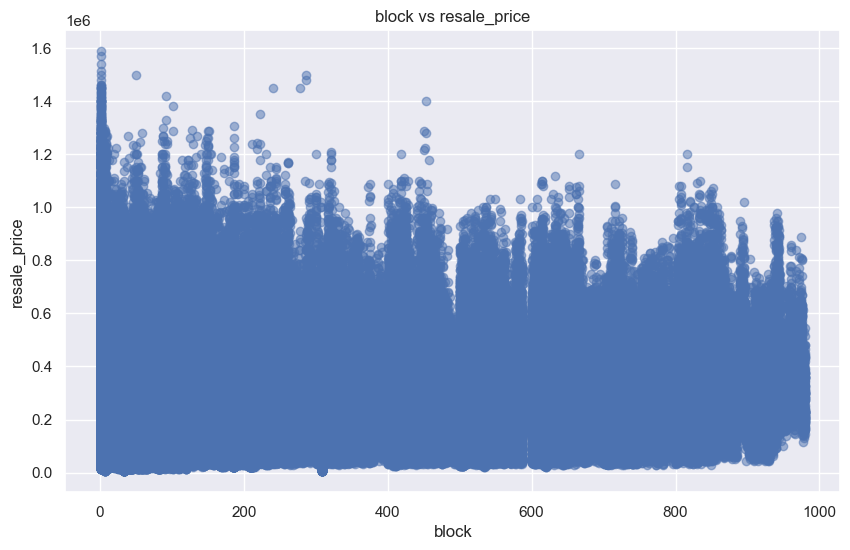

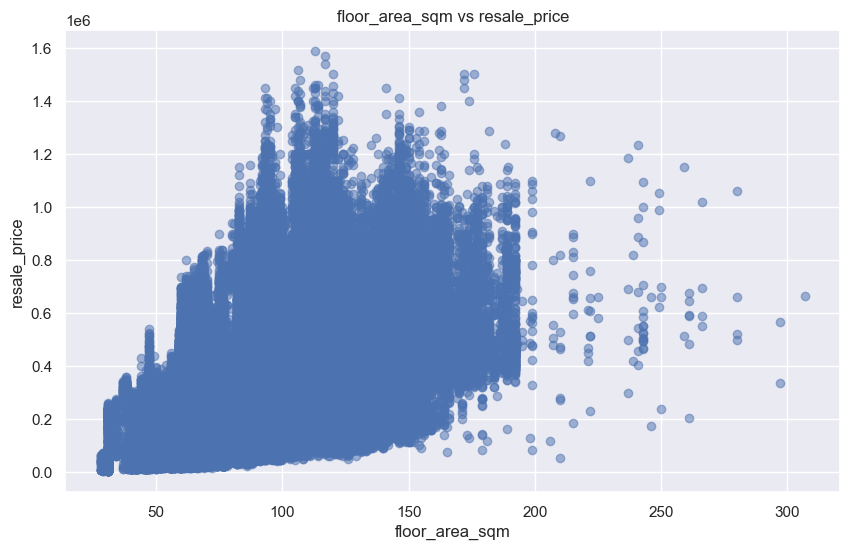

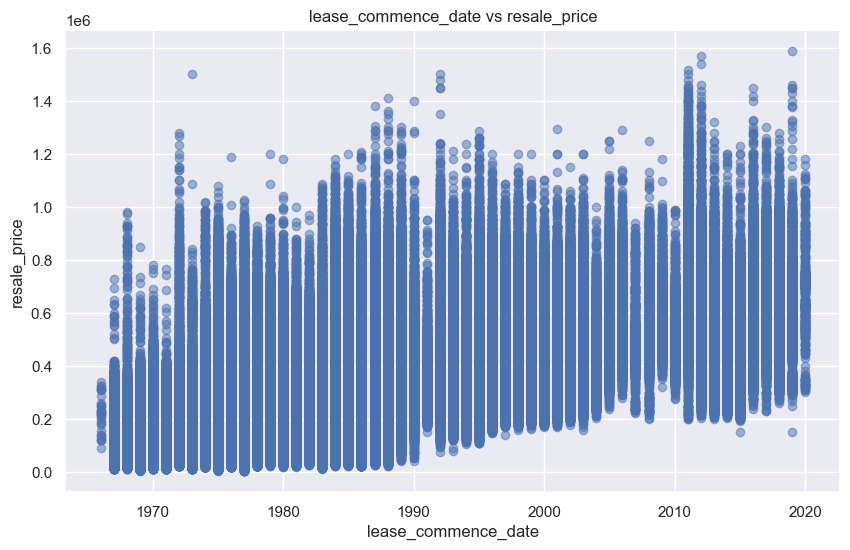

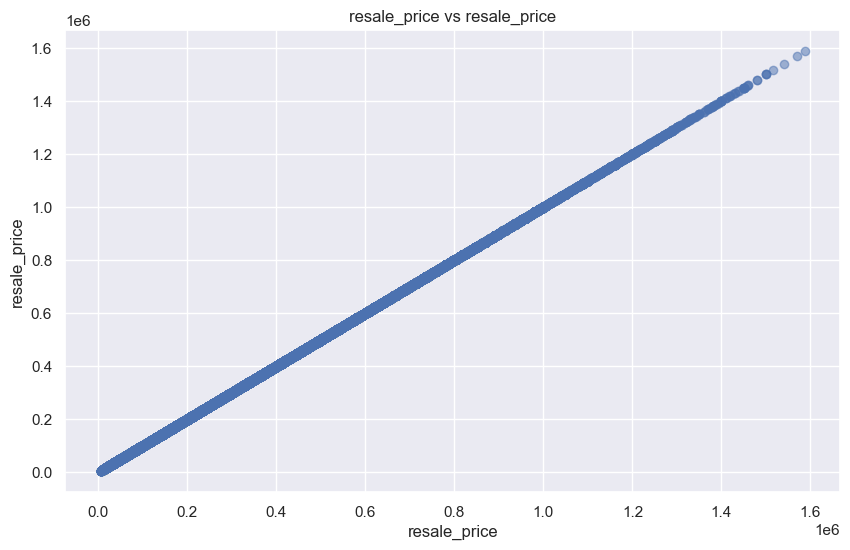

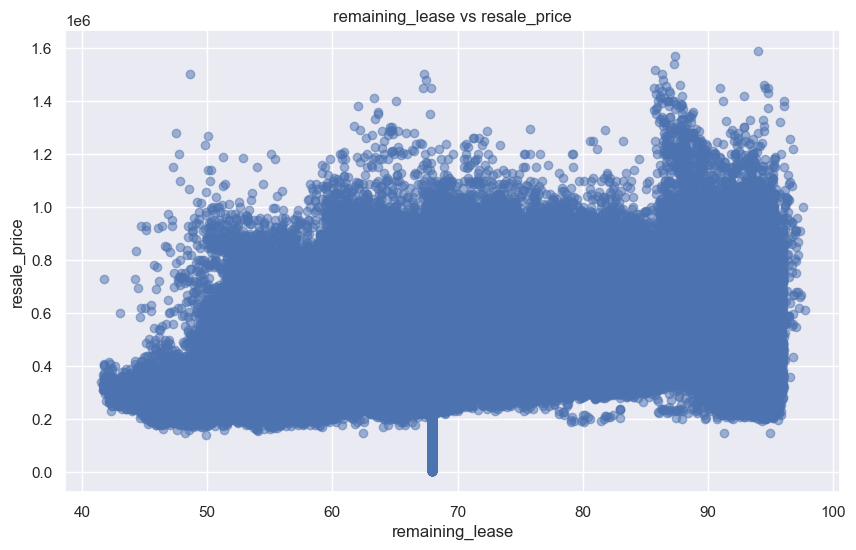

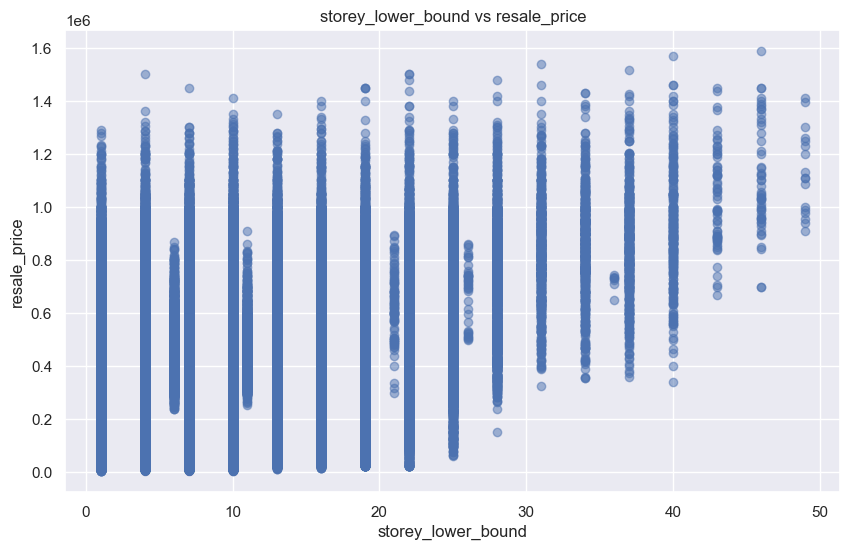

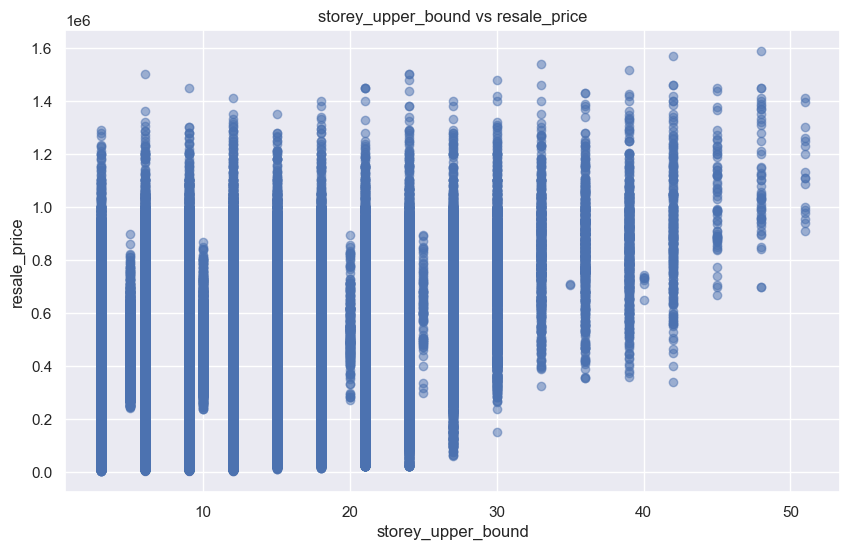

In [38]:
features = [ 'block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease',
'storey_lower_bound', 
'storey_upper_bound']
target = 'resale_price'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

In [39]:
# correlation matrix (ranges from 1 to -1)
corrm=d.corr()
#corrm.to_csv('corrm.csv')
corrm

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
town,1.000000,0.208386,0.050518,0.587206,0.200980,0.163731,0.333189,0.113482,0.189174,0.124117,0.003906,-0.022471,-0.022244
flat_type,0.208386,1.000000,0.127907,0.386932,0.952852,0.242518,0.408551,0.588040,0.120049,0.100997,0.003395,0.077526,0.077840
block,0.050518,0.127907,1.000000,0.046936,0.187801,-0.002843,0.004182,-0.088295,-0.181423,-0.116204,0.002275,-0.130195,-0.130243
street_name,0.587206,0.386932,0.046936,1.000000,0.354896,0.354108,0.737655,0.369032,0.438913,0.317413,0.006150,0.082713,0.083314
floor_area_sqm,0.200980,0.952852,0.187801,0.354896,1.000000,0.200936,0.385309,0.561802,0.078073,0.062483,0.002863,0.042333,0.042506
flat_model,0.163731,0.242518,-0.002843,0.354108,0.200936,1.000000,0.355631,0.252906,0.237127,0.162415,0.001541,0.035520,0.035841
lease_commence_date,0.333189,0.408551,0.004182,0.737655,0.385309,0.355631,1.000000,0.537766,0.702591,0.430826,0.003299,0.171799,0.172193
resale_price,0.113482,0.588040,-0.088295,0.369032,0.561802,0.252906,0.537766,1.000000,0.353948,0.674690,0.004081,0.247228,0.249633
remaining_lease,0.189174,0.120049,-0.181423,0.438913,0.078073,0.237127,0.702591,0.353948,1.000000,0.309349,-0.002693,0.191273,0.190616
resale_year,0.124117,0.100997,-0.116204,0.317413,0.062483,0.162415,0.430826,0.674690,0.309349,1.000000,-0.026049,0.107905,0.109816


In [40]:
d.isna().sum()

town                   0
flat_type              0
block                  0
street_name            0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
resale_year            0
resale_month           0
storey_lower_bound     0
storey_upper_bound     0
dtype: int64

<Axes: >

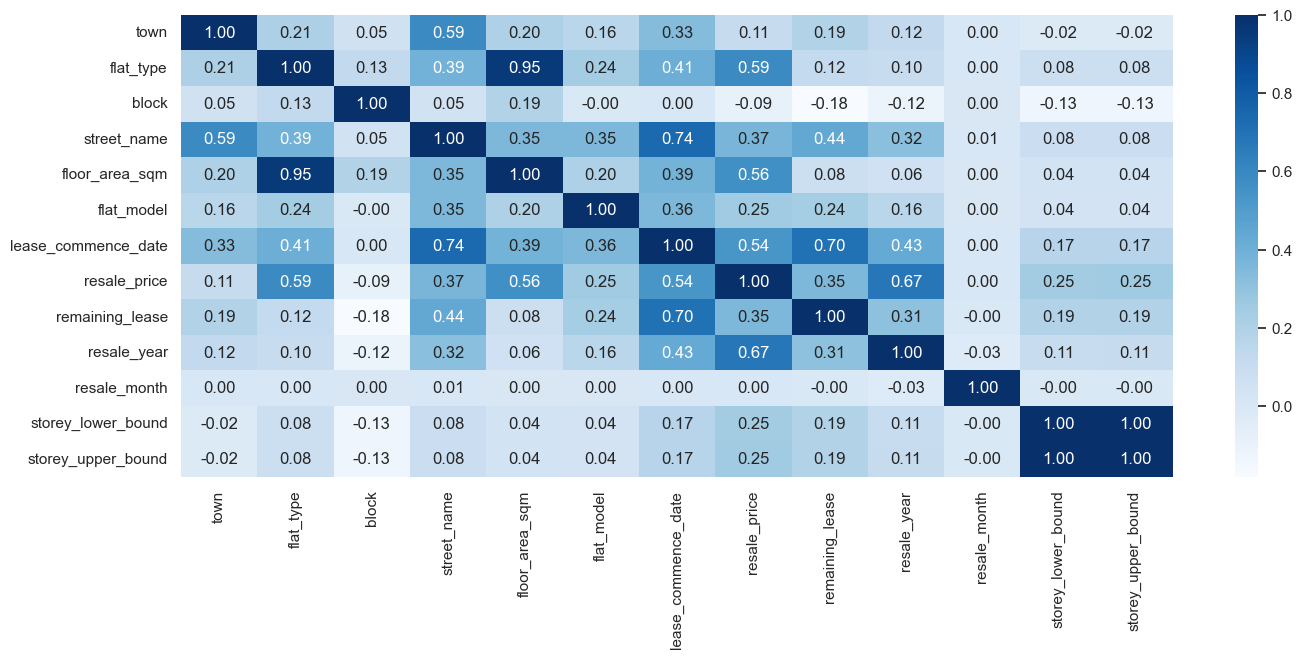

In [41]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

In [42]:
# save the processed data for the deployment
d.to_csv('singapore_resale_pricing.csv')

In [43]:
# assign feature and target variable
X = d.drop('resale_price', axis= 1)
y = d['resale_price']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [44]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(740255, 12) (185064, 12) (740255,) (185064,)


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[-0.34145754,  1.0392001 ,  2.36493831, ...,  0.71704439,
         -0.55662212, -0.5597086 ],
        [-0.08501215, -1.06962221, -0.31537826, ..., -0.74763415,
          1.9341067 ,  1.93101247],
        [-0.34145754,  1.0392001 , -0.50193438, ..., -1.33350556,
          0.06606009,  0.06297167],
        ...,
        [ 1.45366015,  1.0392001 , -0.18973842, ..., -0.16176273,
          1.3114245 ,  1.3083322 ],
        [ 0.29965592, -0.01521105, -0.7608286 , ...,  0.42410868,
          1.3114245 ,  1.3083322 ],
        [-1.23901638, -0.01521105,  0.44607531, ...,  0.71704439,
         -0.55662212, -0.5597086 ]]),
 array([[ 0.684324  , -1.06962221,  2.36874557, ..., -0.16176273,
         -1.17930432, -1.18238887],
        [ 1.58188284,  2.09361126, -0.33060733, ..., -0.74763415,
          0.06606009,  0.06297167],
        [ 1.45366015, -1.06962221, -0.59330881, ...,  1.3029158 ,
          0.06606009,  0.06297167],
        ...,
        [ 0.684324  ,  1.0392001 , -1.10728997, ..., -

In [46]:
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor


#import xgboost as xgb
#from xgboost import XGBRegressor  # Use XGBRegressor for regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Linear Regression

In [47]:
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic


LinearRegression()

In [48]:
print(linear_model.predict(X_test))     #predict
print(y_test)

[197470.43398907 442480.36345959  90086.94499442 ... 358833.18694295
 480892.16131145 245195.39687791]
578760    245000.0
371279    431000.0
80837     101000.0
830016    494000.0
145719    433000.0
            ...   
95120     195000.0
584182    330000.0
362705    343500.0
802185    425000.0
384005    238500.0
Name: resale_price, Length: 185064, dtype: float64


In [49]:
linear_model.score(X_test, y_test)

0.7804844545231135

In [50]:

from sklearn.model_selection import cross_val_score
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.7804317968040093

In [51]:
X_test

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
578760,19,3,915.0,187,73.0,16,1984,68.000000,2009,6,1,3
371279,26,6,206.0,365,146.0,18,1993,68.000000,2002,4,7,9
80837,25,3,137.0,323,73.0,16,1989,68.000000,1994,11,7,9
830016,13,5,351.0,436,121.0,14,1997,76.166667,2020,11,7,9
145719,18,5,116.0,181,121.0,14,1986,68.000000,1996,12,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
95120,1,4,606.0,5,91.0,15,1980,68.000000,1995,7,4,6
584182,20,4,209.0,207,81.0,14,1973,68.000000,2009,8,10,12
362705,19,5,2.0,242,127.0,14,1996,68.000000,2002,1,1,3
802185,19,4,213.0,192,104.0,16,1985,64.583333,2019,8,10,12


Decision Tree Classification

In [52]:
# Create and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=11)
dt_regressor.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=20, random_state=11)

In [53]:

# Make predictions on the test set using Decision Tree model
y_pred_dt = dt_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2) Score
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)
print("Mean Squared Error (MSE)     :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("R-squared (R2) Score         :", r2_dt)

Mean Absolute Error (MAE)    : 18413.13362016713
Mean Squared Error (MSE)     : 786864163.5191
Root Mean Square Error (RMSE): 28051.09914992815
R-squared (R2) Score         : 0.9731104889527382


Prediction

In [54]:

# get sample to predict the resale price
pre_df =d.sample(n=5)
pre_df
     

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
411889,22,4,755.0,221,84.0,19,1986,168000.0,68.000000,2003,7,4,6
773612,27,4,2.0,520,92.0,24,2007,388000.0,88.583333,2018,5,4,6
133723,18,4,315.0,182,93.0,15,1985,315000.0,68.000000,1996,8,4,6
311091,13,4,543.0,138,104.0,16,1984,234000.0,68.000000,2000,9,4,6
196567,2,4,134.0,10,84.0,19,1987,218000.0,68.000000,1998,6,1,3


In [55]:
# drop the resale price column
A = pre_df.drop('resale_price', axis = 1)

In [56]:
A

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
411889,22,4,755.0,221,84.0,19,1986,68.000000,2003,7,4,6
773612,27,4,2.0,520,92.0,24,2007,88.583333,2018,5,4,6
133723,18,4,315.0,182,93.0,15,1985,68.000000,1996,8,4,6
311091,13,4,543.0,138,104.0,16,1984,68.000000,2000,9,4,6
196567,2,4,134.0,10,84.0,19,1987,68.000000,1998,6,1,3


In [138]:
# Make predictions on the sample
pre_pred = dt_regressor.predict(A)
pre_pred

array([172250.        ,  73183.66666667, 300770.        , 450000.        ,
       392476.6737338 ])

In [57]:
import pickle


# save the model to disk
with open('DecisionTree_model.pkl', 'wb') as file:
    pickle.dump(dt_regressor, file)


In [77]:
df['floor_area_sqm'].max()

307.0